In [24]:
library(caret)
library(glmnet)
library(boot)

In [25]:
all_data <- tail(read.csv("../imp_coin.csv"),517)
# [c(3,7,9,15,21,27,33,39,45)]
# all_data <- tail(read.csv("../imp_coin.csv")[c(3,7,9,13,15,19,21,25,27,31,33,37,39,43)], 1000)

In [26]:
head(all_data)

,X,Date,btc_price,btc_open,btc_high,btc_low,btc_vol,btc_change,bch_price,bch_open,⋯,btcsv_vol,btcsv_change,bitfinex_volume_from,bitfinex_volume_To,bitstamp_volume_from,bitstamp_volume_To,coinbase_volume_from,coinbase_volume_To,kraken_volume_from,kraken_volume_To
2574,2574,2017-08-03,2810.0,2720.5,2822.9,2717.6,68100,3.29,327.40,399.00,⋯,0,0,16773.53,46230051,7963.67,21938229,7425.48,20432558,6048.48,16627457
2575,2575,2017-08-04,2878.5,2810.0,2892.7,2779.5,68760,2.44,220.61,327.40,⋯,0,0,18909.44,53557929,7635.81,21650042,7713.12,21820112,5938.84,16872848
2576,2576,2017-08-05,3262.8,2878.5,3344.0,2875.9,159400,13.35,210.00,220.61,⋯,0,0,50437.82,159197332,16994.20,53855576,21555.81,67805790,12826.67,40630080
2577,2577,2017-08-06,3232.0,3262.8,3295.1,3166.5,60660,-0.94,217.75,210.00,⋯,0,0,16918.06,54834444,5998.74,19412656,8658.64,27905582,5404.91,17539147
2578,2578,2017-08-07,3401.9,3232.0,3425.1,3198.5,88110,5.26,320.00,217.75,⋯,0,0,24469.93,81595403,12042.05,40212286,11321.74,37825761,6361.52,21177045
2579,2579,2017-08-08,3429.4,3401.9,3494.9,3357.1,106940,0.81,342.23,320.00,⋯,0,0,31626.45,108062487,15829.04,54033181,15999.81,54708051,7422.97,25453557


btc_price btc_open btc_high btc_low btc_vol btc_change
bch_price bch_open bch_high bch_low bch_vol bch_change
eos_price eos_open eos_high eos_low eos_vol eos_change 
eth_price eth_open eth_high eth_low eth_vol eth_change
ltc_price ltc_open ltc_high ltc_low ltc_vol ltc_change
usdt_price usdt_open usdt_high usdt_low usdt_vol usdt_change
xrp_price xrp_open xrp_high xrp_low xrp_vol xrp_change
btcsv_price btcsv_open btcsv_high btcsv_low btcsv_vol btcsv_change

# Create glm model on all data from 2017

In [27]:
lm_all <- glm(btc_price~ btc_vol+
bch_price+ bch_open+ bch_high+ bch_low +bch_vol+ bch_change+
eos_price +eos_open +eos_high+ eos_low+ eos_vol+ eos_change+
eth_price+ eth_open+ eth_high+ eth_low+ eth_vol+ eth_change+
ltc_price+ ltc_open+ ltc_high+ ltc_low+ ltc_vol+ ltc_change+
usdt_price+ usdt_open+ usdt_high+ usdt_low+ usdt_vol+ usdt_change+
xrp_price+ xrp_open+ xrp_high+ xrp_low+ xrp_vol+ xrp_change+
btcsv_price+ btcsv_open+ btcsv_high+ btcsv_low+ btcsv_vol+ btcsv_change, data = all_data)

In [28]:
summary(lm_all)


Call:
glm(formula = btc_price ~ btc_vol + bch_price + bch_open + bch_high + 
    bch_low + bch_vol + bch_change + eos_price + eos_open + eos_high + 
    eos_low + eos_vol + eos_change + eth_price + eth_open + eth_high + 
    eth_low + eth_vol + eth_change + ltc_price + ltc_open + ltc_high + 
    ltc_low + ltc_vol + ltc_change + usdt_price + usdt_open + 
    usdt_high + usdt_low + usdt_vol + usdt_change + xrp_price + 
    xrp_open + xrp_high + xrp_low + xrp_vol + xrp_change + btcsv_price + 
    btcsv_open + btcsv_high + btcsv_low + btcsv_vol + btcsv_change, 
    data = all_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2763.8   -575.4    -14.5    518.5   7772.8  

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.806e+04  7.017e+03   5.424 9.32e-08 ***
btc_vol       8.197e-05  3.823e-05   2.144 0.032550 *  
bch_price    -1.721e+00  1.287e+00  -1.337 0.181773    
bch_open     -2.587e+00  9.965e-01  -2.596 0.009735 ** 
bch_h

In [29]:
step(data=all_data, lm_all, direction="both",k=10)

Start:  AIC=9011.7
btc_price ~ btc_vol + bch_price + bch_open + bch_high + bch_low + 
    bch_vol + bch_change + eos_price + eos_open + eos_high + 
    eos_low + eos_vol + eos_change + eth_price + eth_open + eth_high + 
    eth_low + eth_vol + eth_change + ltc_price + ltc_open + ltc_high + 
    ltc_low + ltc_vol + ltc_change + usdt_price + usdt_open + 
    usdt_high + usdt_low + usdt_vol + usdt_change + xrp_price + 
    xrp_open + xrp_high + xrp_low + xrp_vol + xrp_change + btcsv_price + 
    btcsv_open + btcsv_high + btcsv_low + btcsv_vol + btcsv_change

               Df  Deviance    AIC
- ltc_change    1 478414900 9001.7
- eth_vol       1 478440871 9001.7
- usdt_low      1 478453257 9001.7
- btcsv_low     1 478470095 9001.8
- eth_change    1 478475222 9001.8
- xrp_vol       1 478492167 9001.8
- btcsv_price   1 478560536 9001.9
- eth_high      1 478561116 9001.9
- xrp_change    1 478575634 9001.9
- btcsv_high    1 478593474 9001.9
- usdt_open     1 478617272 9001.9
- eos_change    1 


Call:  glm(formula = btc_price ~ bch_high + bch_low + bch_vol + eth_price + 
    ltc_price + ltc_vol + usdt_price + btcsv_vol, data = all_data)

Coefficients:
(Intercept)     bch_high      bch_low      bch_vol    eth_price    ltc_price  
  3.186e+04   -2.212e+00    5.882e+00    8.585e-04   -2.272e+00    2.622e+01  
    ltc_vol   usdt_price    btcsv_vol  
  2.788e-04   -2.960e+04   -2.326e-03  

Degrees of Freedom: 516 Total (i.e. Null);  508 Residual
Null Deviance:	    5.003e+09 
Residual Deviance: 535600000 	AIC: 8648

In [39]:
test = glm(formula = btc_price ~ bch_high + bch_low + bch_vol + eth_price + ltc_price + ltc_vol + usdt_price + btcsv_vol, data = all_data)
cv.glm(all_data, test, K = 10)$delta

[1] 1121203 1116510

In [47]:
train.data  <- head(all_data, 400)
test.data <- data.frame(tail(all_data, -400))

In [48]:
test_model = glm(formula = btc_price ~ bch_high + bch_low + bch_vol + eth_price + ltc_price + ltc_vol + usdt_price + btcsv_vol, data = train.data)

In [53]:
length(test.data[c('bch_high', 'bch_low', 'bch_vol', 'eth_price', 'ltc_price', 'ltc_vol', 'usdt_price', 'btcsv_vol')])

ERROR: Error in parse(text = x, srcfile = src): <text>:1:128: unexpected INCOMPLETE_STRING
1: length(test.data[c('bch_high', 'bch_low', 'bch_vol', 'eth_price', 'ltc_price', 'ltc_vol', 'usdt_price', 'btcsv_vol')]$btcsv_vol')
                                                                                                                                   ^


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”

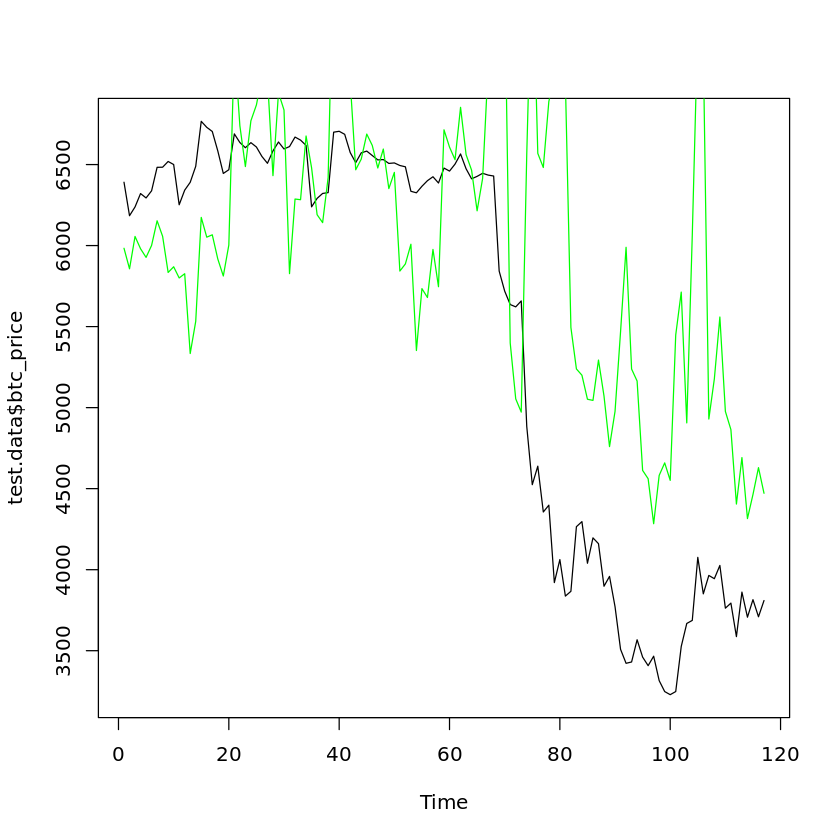

In [46]:

pred = predict(test_model, )
plot.ts(test.data$btc_price)
lines(pred, col="green")

In [43]:
mean((test.data$btc_price - pred)^2)

[1] 1496910

# Lasso

In [10]:
train.data  <- head(all_data, 400)
test.data <- tail(all_data, -400)
x <- model.matrix(btc_price~., train.data)[,-1]
y <- as.double(train.data$btc_price)
x.test <- model.matrix(btc_price ~., test.data)[,-1]
lambdas_to_try <- 10^seq(-3, 10, length.out = 100)
set.seed(1) 
cv.lasso <- cv.glmnet(x, y, alpha = 1, type.measure='mse', lambda = lambdas_to_try, nfolds = 10)

In [11]:
model_10_nfolds <- glmnet(x, y, alpha = 1, family = "gaussian", lambda = cv.lasso$lambda.min)
pred_10 = predict(model_10_nfolds, newx = x.test)

In [12]:
mean((test.data$btc_price - pred_10)^2)

[1] 7220.583

[1] 117


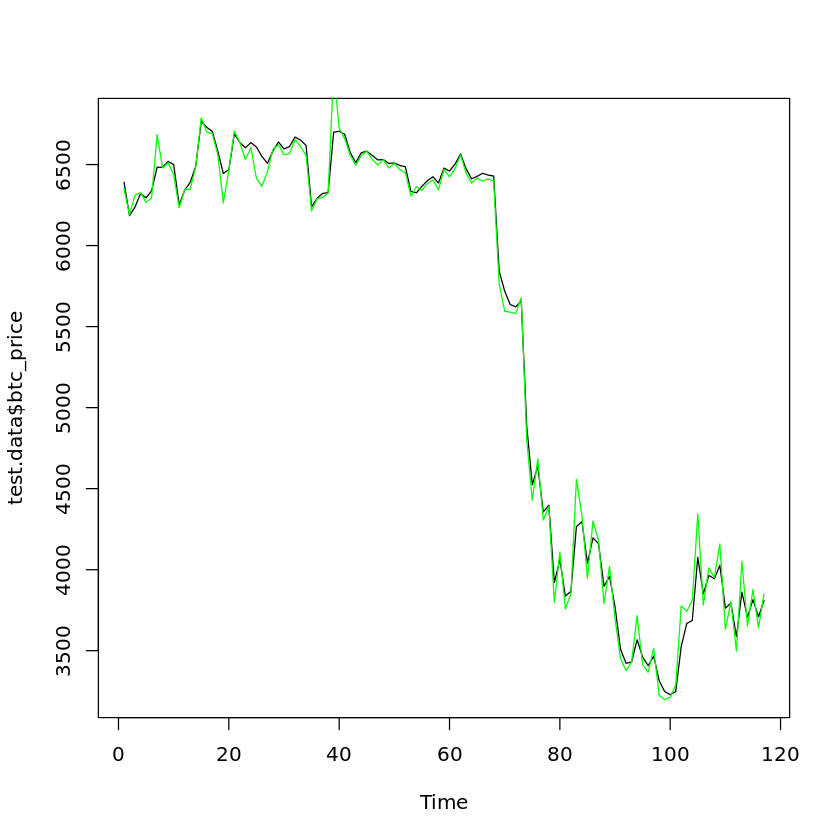

In [13]:
plot.ts(test.data$btc_price)
print(length(test.data$btc_price))
lines(pred_10, col="green")

# Testing on the 3 coin with dealy 3 day

In [14]:
all_data_3 <- read.csv("../coin_3_day.csv")[-c(8,12,16)]

In [15]:
head(all_data_3)

btc,btc_1,btc_2,btc_3,eth,eth_1,eth_2,ltc,ltc_1,ltc_2,xrp,xrp_1,xrp_2
995.4,1017.0,1033.3,1135.4,8.20,8.37,9.74,4.51,4.56,4.55,0.00635,0.00631,0.00641
1017.0,1033.3,1135.4,989.3,8.37,9.74,11.00,4.56,4.55,4.55,0.00631,0.00641,0.00641
1033.3,1135.4,989.3,886.2,9.74,11.00,10.15,4.55,4.55,4.23,0.00641,0.00641,0.00628
1135.4,989.3,886.2,888.9,11.00,10.15,10.08,4.55,4.23,3.88,0.00641,0.00628,0.00622
989.3,886.2,888.9,900.9,10.15,10.08,9.84,4.23,3.88,3.98,0.00628,0.00622,0.00636
886.2,888.9,900.9,899.8,10.08,9.84,10.28,3.88,3.98,4.03,0.00622,0.00636,0.00625


In [16]:
lm_3 <- glm(btc_3 ~ btc + btc_1 + btc_2 + eth + eth_1 + eth_2 + ltc +ltc_1+ltc_2+xrp+xrp_1+xrp_2, data = all_data_3)

In [17]:
step(data=all_data_3, lm_3, direction="both",k=10)

Start:  AIC=10726.76
btc_3 ~ btc + btc_1 + btc_2 + eth + eth_1 + eth_2 + ltc + ltc_1 + 
    ltc_2 + xrp + xrp_1 + xrp_2

        Df  Deviance   AIC
- ltc    1  89141348 10717
- eth_2  1  89149585 10717
- eth_1  1  89322946 10718
- ltc_1  1  89423451 10719
- btc    1  89747665 10722
- eth    1  89832995 10722
- ltc_2  1  89864096 10723
<none>      89134690 10727
- btc_1  1  91550287 10736
- xrp_2  1  91623682 10737
- xrp_1  1  99338055 10796
- xrp    1  99915078 10800
- btc_2  1 177041499 11216

Step:  AIC=10716.81
btc_3 ~ btc + btc_1 + btc_2 + eth + eth_1 + eth_2 + ltc_1 + ltc_2 + 
    xrp + xrp_1 + xrp_2

        Df  Deviance   AIC
- eth_2  1  89153257 10707
- eth_1  1  89324131 10708
- ltc_1  1  89570045 10710
- btc    1  89771626 10712
- ltc_2  1  89874968 10713
- eth    1  89890061 10713
<none>      89141348 10717
+ ltc    1  89134690 10727
- xrp_2  1  91670641 10727
- btc_1  1  91720753 10728
- xrp_1  1  99350667 10786
- xrp    1  99915890 10790
- btc_2  1 179440949 11216

Step:  


Call:  glm(formula = btc_3 ~ btc + btc_1 + btc_2 + xrp + xrp_1 + xrp_2, 
    data = all_data_3)

Coefficients:
(Intercept)          btc        btc_1        btc_2          xrp        xrp_1  
    29.6000       0.1684      -0.3422       1.1811   -2274.6615    3523.6529  
      xrp_2  
 -1408.4748  

Degrees of Freedom: 727 Total (i.e. Null);  721 Residual
Null Deviance:	    1.019e+10 
Residual Deviance: 91250000 	AIC: 10630

In [18]:
test3= glm(formula = btc_3 ~ btc + btc_1 + btc_2 + xrp + xrp_1 + xrp_2, data = all_data_3)

In [19]:
cv.glm(all_data_3, test3, K = 10)$delta

[1] 134444.3 133947.6

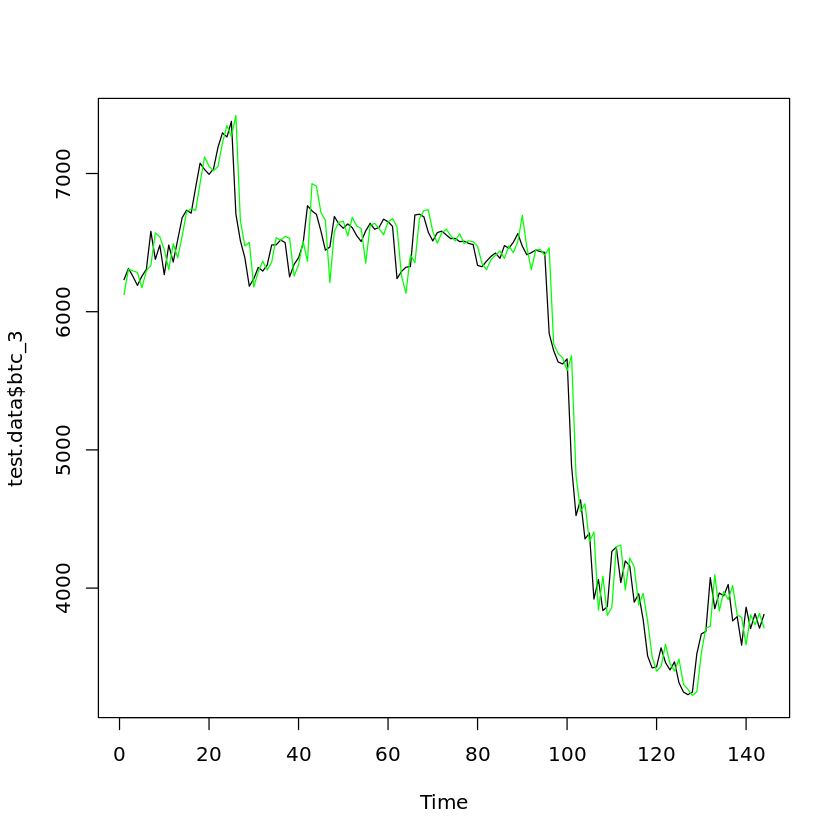

In [20]:
set.seed(1)
training.samples <- createDataPartition(all_data_3$btc_3, p = 0.8, list = FALSE)
train.data  <- all_data_3[training.samples, ]
test.data <- all_data_3[-training.samples, ]

train.data  <- head(all_data_3, 584)
test.data <- tail(all_data_3, -584)

lm_3 <- glm(formula = btc_3 ~ btc + btc_1 + btc_2 + xrp + xrp_1 + xrp_2, data = train.data)

pred_5 = predict(test3, test.data[-4])
plot.ts(test.data$btc_3)
lines(pred_5, col="green")


In [21]:
mean((test.data$btc_3 - pred_5)^2)

[1] 32454.44